#Assignment 03 Exploratory Data Analysis
## Ricardo Saca
## MBA 688 - Dr. Villa

### Importing the Packages and Data

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

Must make sure that the data file is in the runtime

In [ ]:
df = pd.read_csv('data/A03_CellPhoneChurn.csv')

Checking that the data is available

In [ ]:
df.head()

,Customer,Account Length,International Plan,Voice Mail Plan,Voice Mail Messages,Day Minutes,Day Calls,Day Charge,Evening Minutes,Evening Calls,Evening Charge,Night Minutes,Night Calls,Night Charge,International Minutes,International Calls,International Charge,Customer Service Calls,Churn?
0,1,111,0,0,0,214.3,118,36.43,208.5,76,17.72,182.4,98,8.21,12.0,2,3.24,1,0
1,2,127,0,0,0,239.8,107,40.77,128.9,121,10.96,249.9,110,11.25,11.3,5,3.05,1,0
2,3,63,0,0,0,207.6,96,35.29,229.0,112,19.47,162.6,131,7.32,13.3,2,3.59,1,0
3,4,81,0,1,24,130.1,117,22.12,196.0,61,16.66,139.3,123,6.27,11.4,5,3.08,0,0
4,5,49,0,0,0,266.3,90,45.27,207.8,117,17.66,205.0,98,9.23,14.0,2,3.78,2,1


### Describing the Variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer,2094.0,1047.500000,604.630052,1.00,524.2500,1047.500,1570.7500,2094.00
Account Length,2094.0,100.751671,40.903630,1.00,72.0000,101.000,128.0000,232.00
International Plan,2094.0,0.094078,0.292007,0.00,0.0000,0.000,0.0000,1.00
Voice Mail Plan,2094.0,0.266476,0.442221,0.00,0.0000,0.000,1.0000,1.00
Voice Mail Messages,2094.0,7.786055,13.477098,0.00,0.0000,0.000,17.0000,51.00
Day Minutes,2094.0,180.201815,54.636998,0.00,144.2250,180.100,216.1500,346.80
Day Calls,2094.0,100.253582,20.353333,0.00,87.0000,101.000,114.0000,163.00
Day Charge,2094.0,30.634876,9.288271,0.00,24.5150,30.615,36.7425,58.96
Evening Minutes,2094.0,201.753582,50.063890,0.00,167.1250,202.300,236.2750,351.60
Evening Calls,2094.0,99.804202,20.034391,0.00,87.0000,100.000,113.0000,168.00


In [ ]:
df.dtypes

Customer                    int64
Account Length              int64
International Plan          int64
Voice Mail Plan             int64
Voice Mail Messages         int64
Day Minutes               float64
Day Calls                   int64
Day Charge                float64
Evening Minutes           float64
Evening Calls               int64
Evening Charge            float64
Night Minutes             float64
Night Calls                 int64
Night Charge              float64
International Minutes     float64
International Calls         int64
International Charge      float64
Customer Service Calls      int64
Churn?                      int64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      11
float64     8
dtype: int64

Here we see that all of the values in our data set are numeric. In the form of float64 or int64. We also show the countrs of each data type. We must be aware that there are some variables that are dummy variables and must be treated as categorical when analyzing them visually

In [ ]:
#Select numeric columns
numeric = df.select_dtypes(include =[np.number])
cols = numeric.columns.values
print('Numeric Columns are:\n', cols)


Numeric Columns are:
 ['Customer' 'Account Length' 'International Plan' 'Voice Mail Plan'
 'Voice Mail Messages' 'Day Minutes' 'Day Calls' 'Day Charge'
 'Evening Minutes' 'Evening Calls' 'Evening Charge' 'Night Minutes'
 'Night Calls' 'Night Charge' 'International Minutes'
 'International Calls' 'International Charge' 'Customer Service Calls'
 'Churn?']


As we can see the data in this data set is compromised of only Numeric types. I will focus the analytic techniques based on this. 

### Making sure there is no missing data

In [ ]:
#Missing Data Percentage List
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} = {round(pct_missing*100,2)}%')

Customer = 0.0%
Account Length = 0.0%
International Plan = 0.0%
Voice Mail Plan = 0.0%
Voice Mail Messages = 0.0%
Day Minutes = 0.0%
Day Calls = 0.0%
Day Charge = 0.0%
Evening Minutes = 0.0%
Evening Calls = 0.0%
Evening Charge = 0.0%
Night Minutes = 0.0%
Night Calls = 0.0%
Night Charge = 0.0%
International Minutes = 0.0%
International Calls = 0.0%
International Charge = 0.0%
Customer Service Calls = 0.0%
Churn? = 0.0%


As we can see this is a very clean data set since there is no missing data. 

### Visualizing our Data

Visualizing our Data by using a Histogram, Violingplot, and Boxplot for numeric data; while using a Boxplot for our dummy variables
We ignore Customer since it is only an id value. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/li

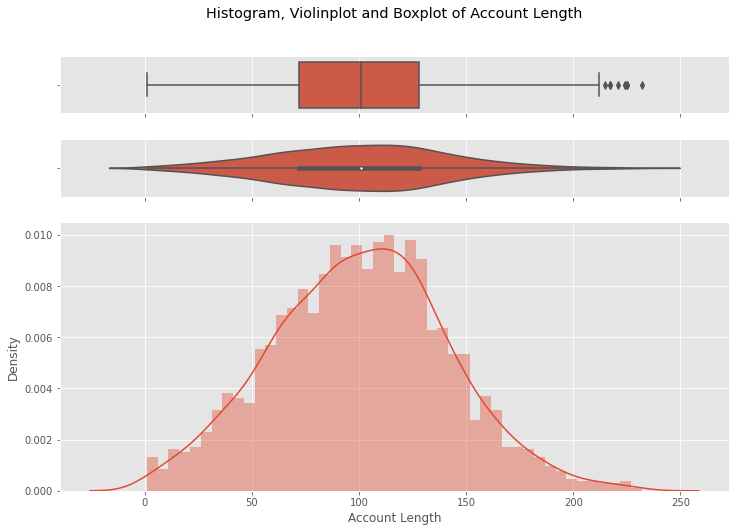

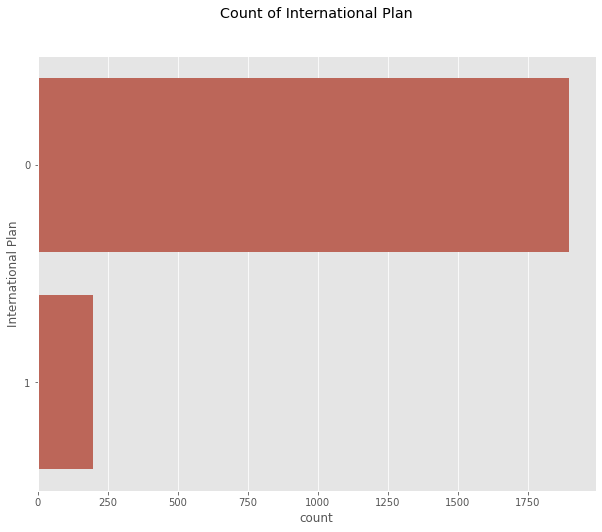

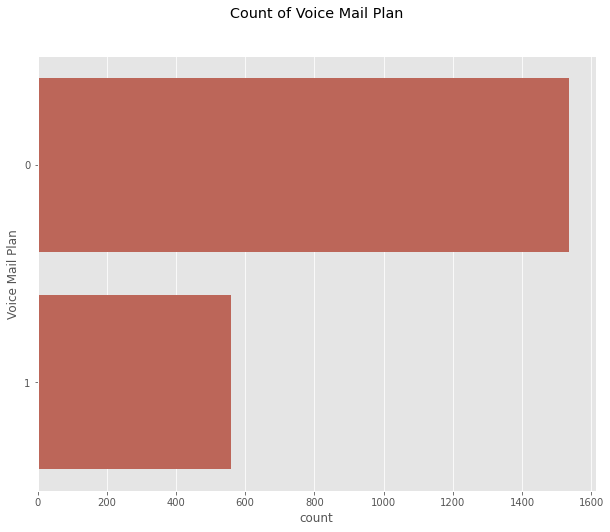

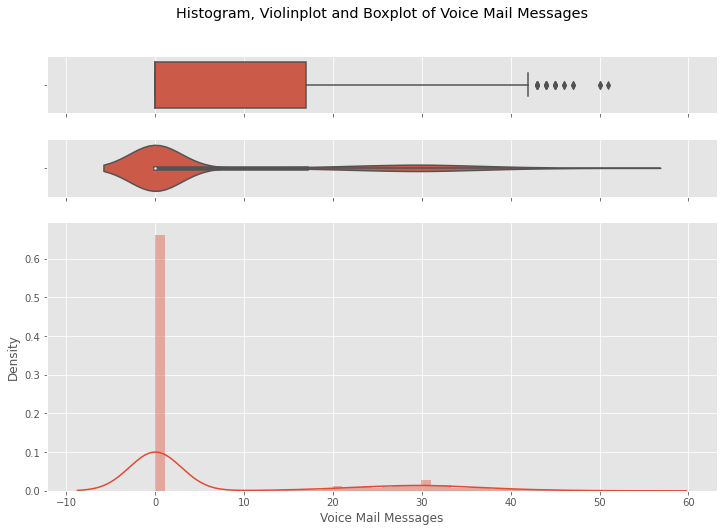

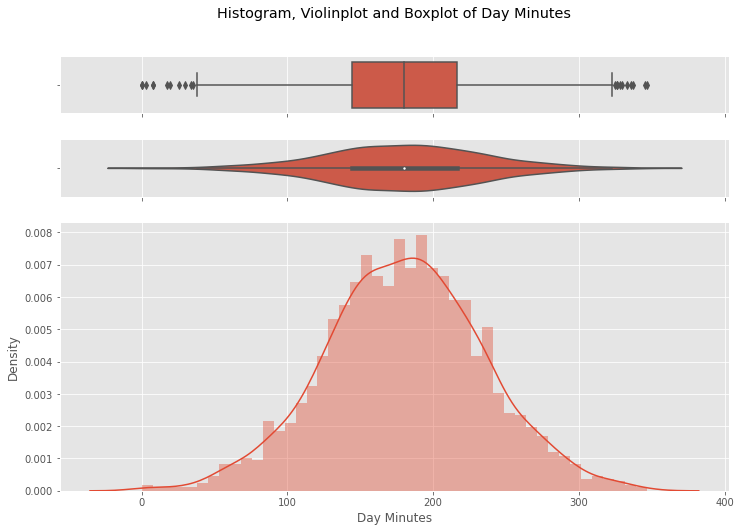

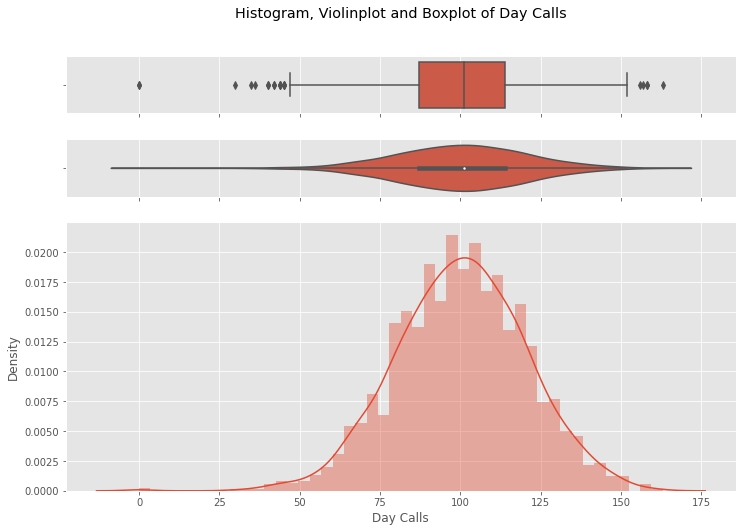

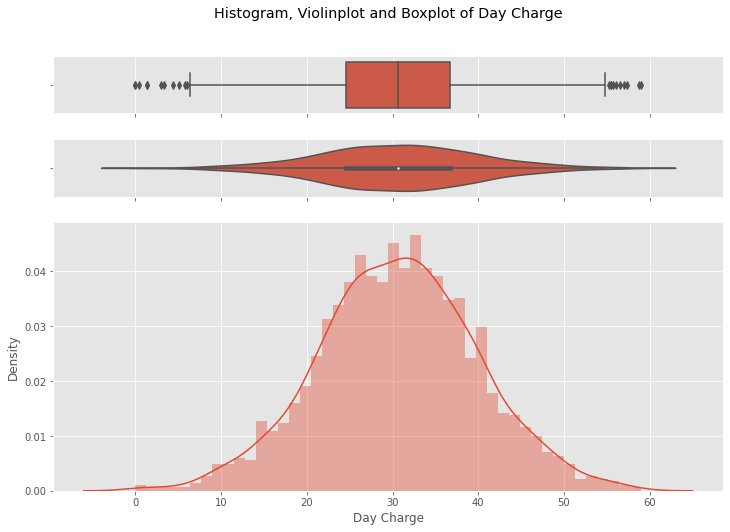

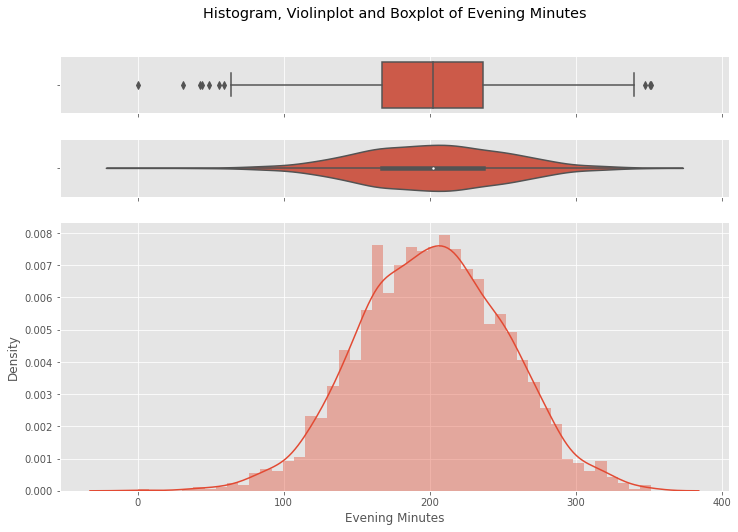

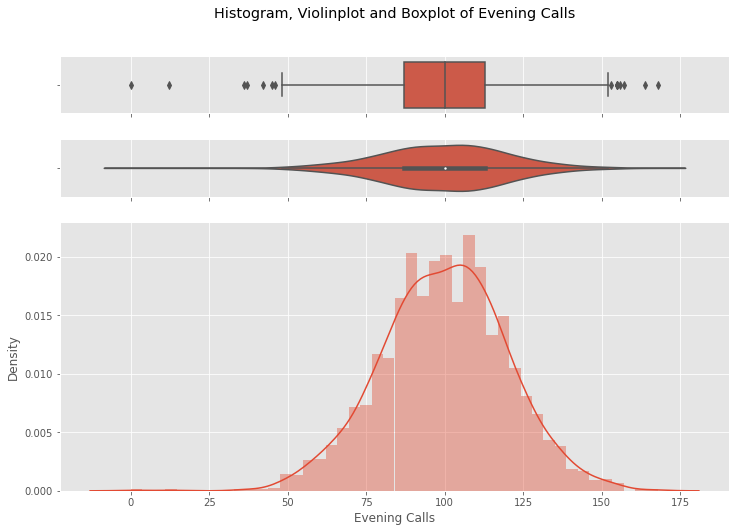

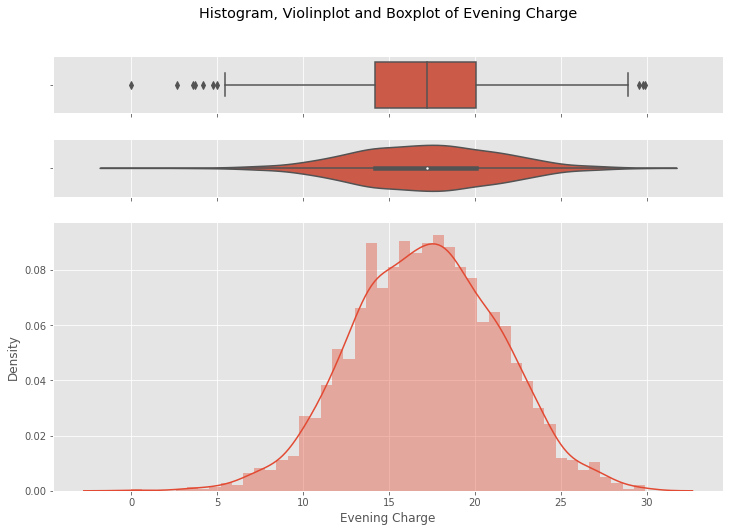

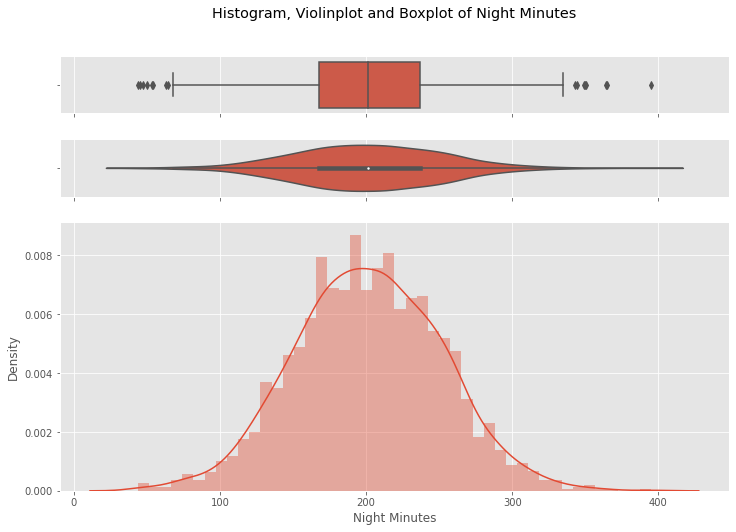

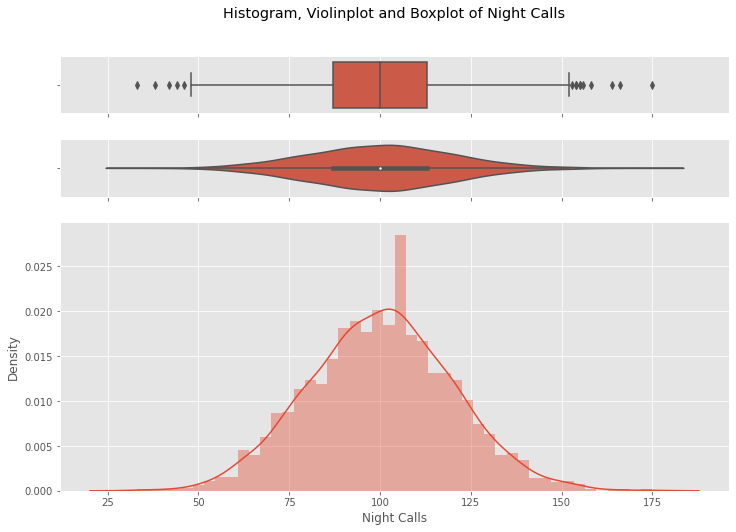

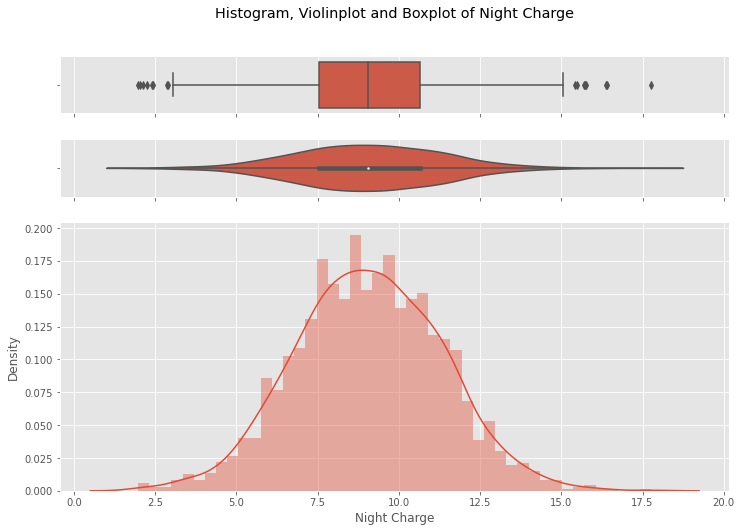

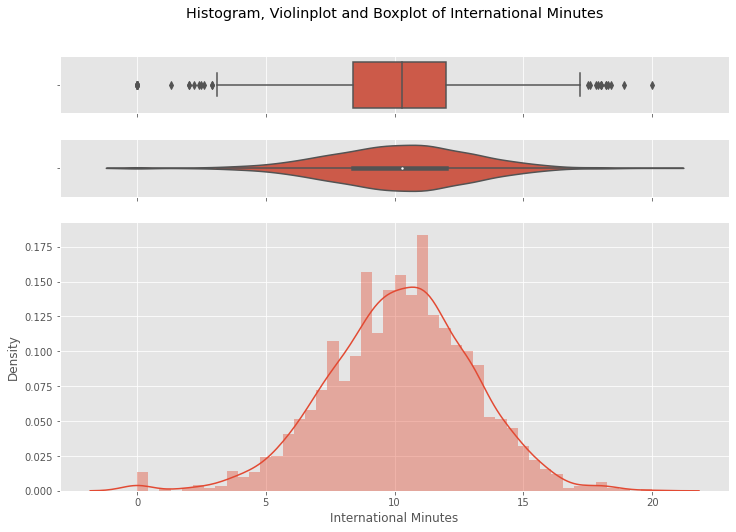

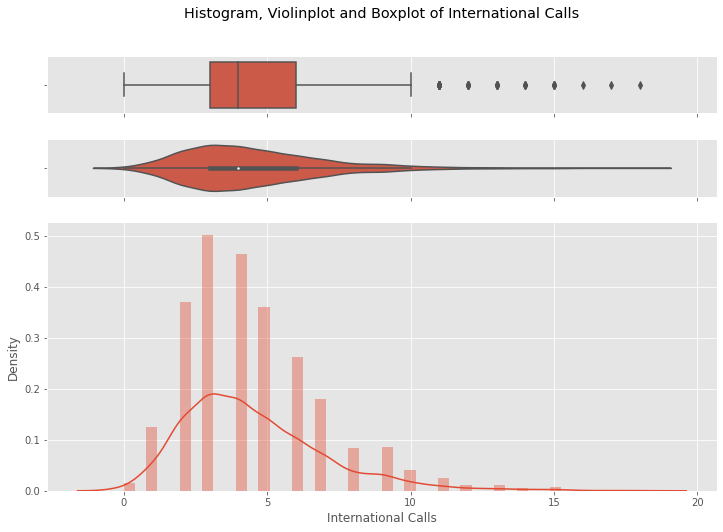

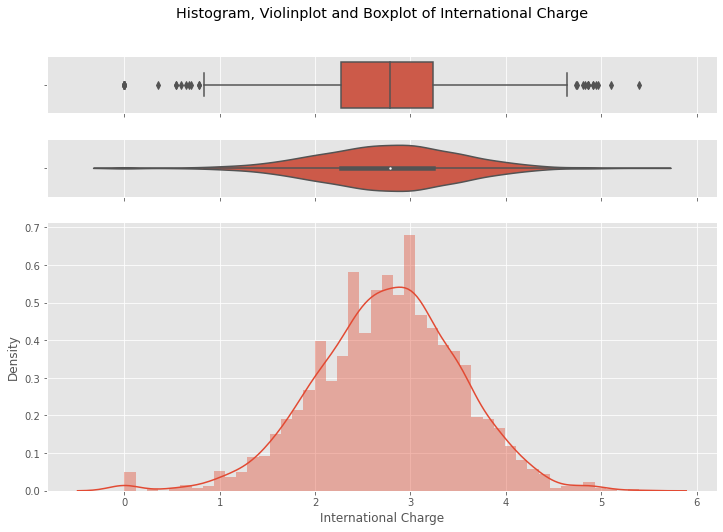

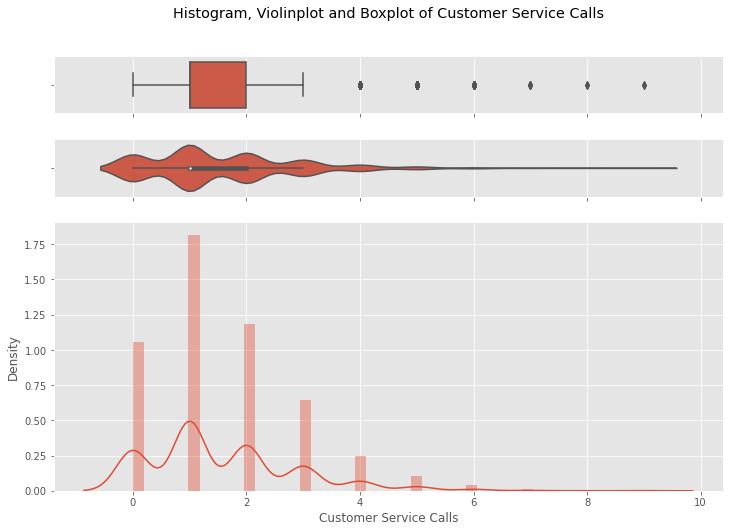

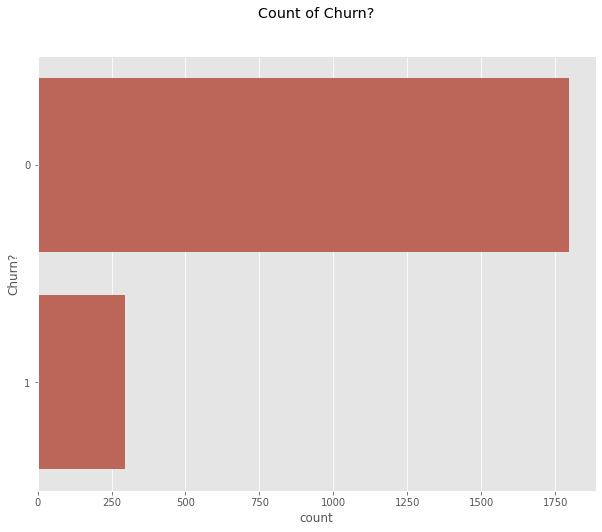

In [ ]:
for col in df.columns:
    if col == 'Customer':
        pass
    elif col in ['International Plan','Voice Mail Plan','Churn?']:
        sns.set_color_codes()
        fig, ax = plt.subplots(figsize=(10,8))
        top_n = df[col].value_counts().index[:6]
        sns.countplot(
            y = col,
            data = (
                df.assign(
                    value=df[col].where(
                        df[col].isin(top_n), "Other"
                    )
                )
            ), color='#cc5a49'
        )
        ax.set(title="Count of {}\n\n".format(col))
    else:        
        column = str(col)
        count = df[column].count()
        num_bins = math.ceil(np.sqrt(count))
        #Histogram of Price
        #Cut the window in 2 parts
        f, (ax_box, ax_viol, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15,.15, .7)})
    
        # Add a graph in each part
        sns.boxplot(x=df[col], ax=ax_box)
        sns.violinplot(x=df[col], ax=ax_viol)
        sns.distplot(x=df[col], bins = num_bins, ax=ax_hist)
    
        # Remove x axis name for the boxplot and set title
        ax_box.set(title="Histogram, Violinplot and Boxplot of {}\n\n".format(col),xlabel='')
        ax_viol.set(xlabel='')


Boxplot of Churn? by different numerical variables to see if we can identify any difference between people who churn and those who don't 

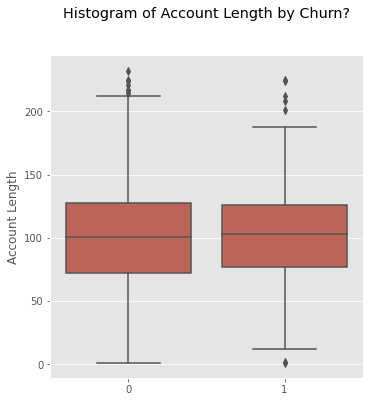

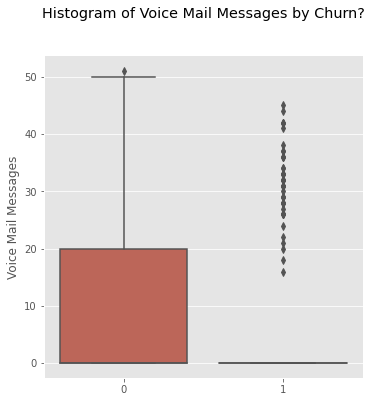

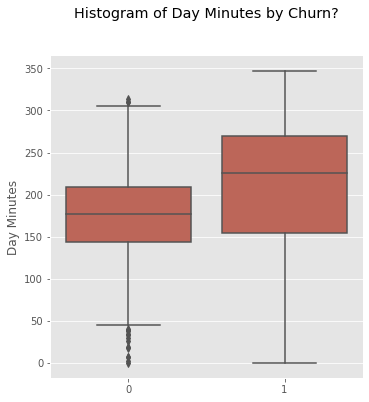

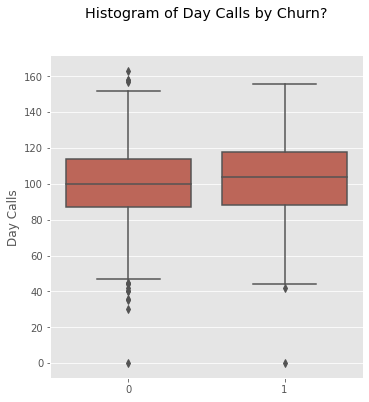

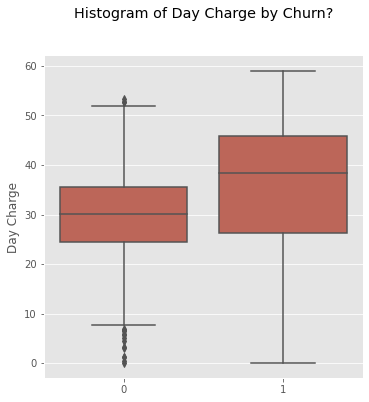

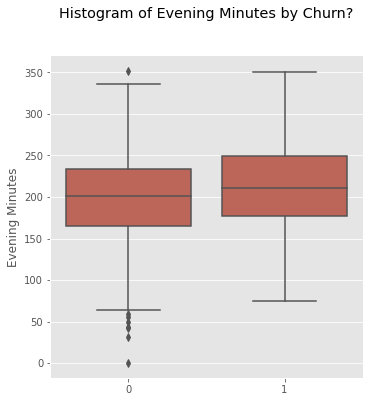

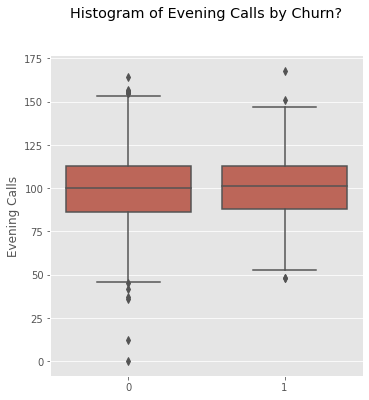

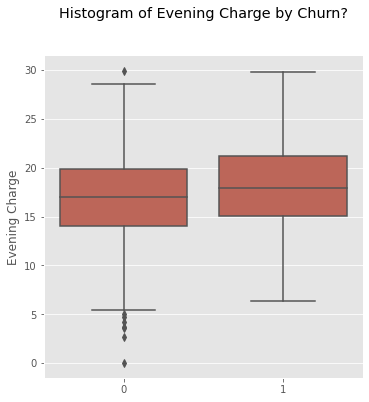

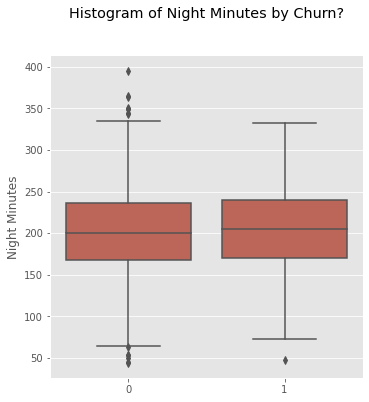

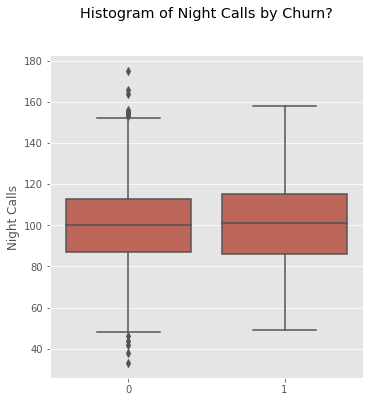

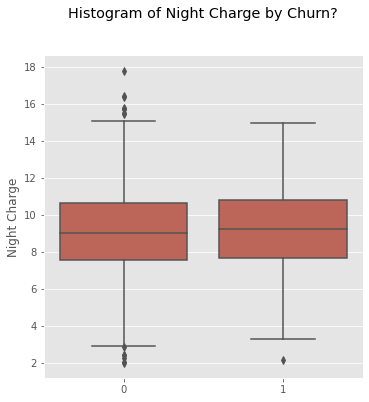

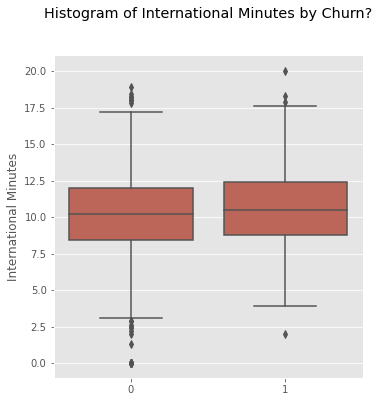

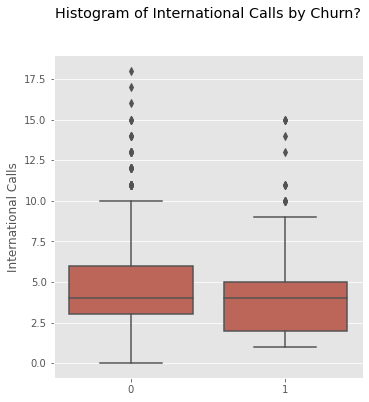

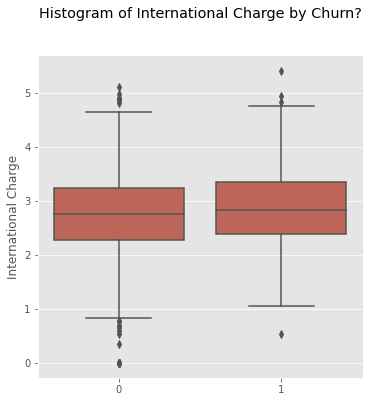

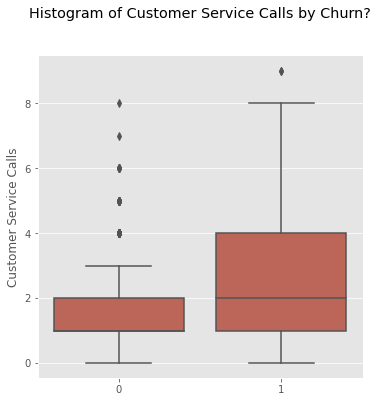

In [ ]:
numerical =  ['Account Length', 'Voice Mail Messages', 'Day Minutes', 'Day Calls', 'Day Charge',
 'Evening Minutes', 'Evening Calls', 'Evening Charge', 'Night Minutes', 'Night Calls', 'Night Charge', 'International Minutes', 'International Calls', 'International Charge', 'Customer Service Calls']
for col in numerical:
    g = sns.catplot(
        x=df['Churn?'], y=df[col], data=df, kind="box", color='#cc5a49' 
    )
    g.set(title="Histogram of {} by Churn?\n\n".format(col),xlabel='')

The main things of interest are Customer Service Calls and Day Minutes (as well as Day Charge) are related to higher numbers by the customers who Churn. 

### Visualizing Correlations

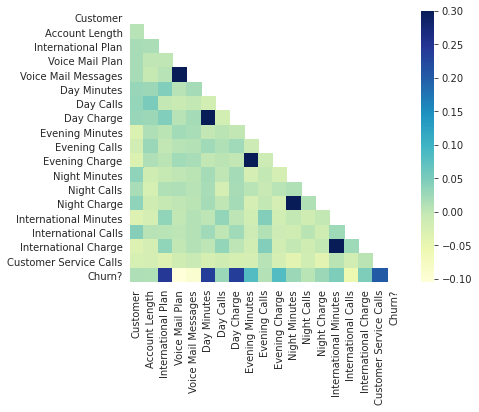

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, cmap='YlGnBu', mask=mask, vmax=.3, square=True)

Text(0.5, 1.0, 'Correlation Heatmap of all variables\n')

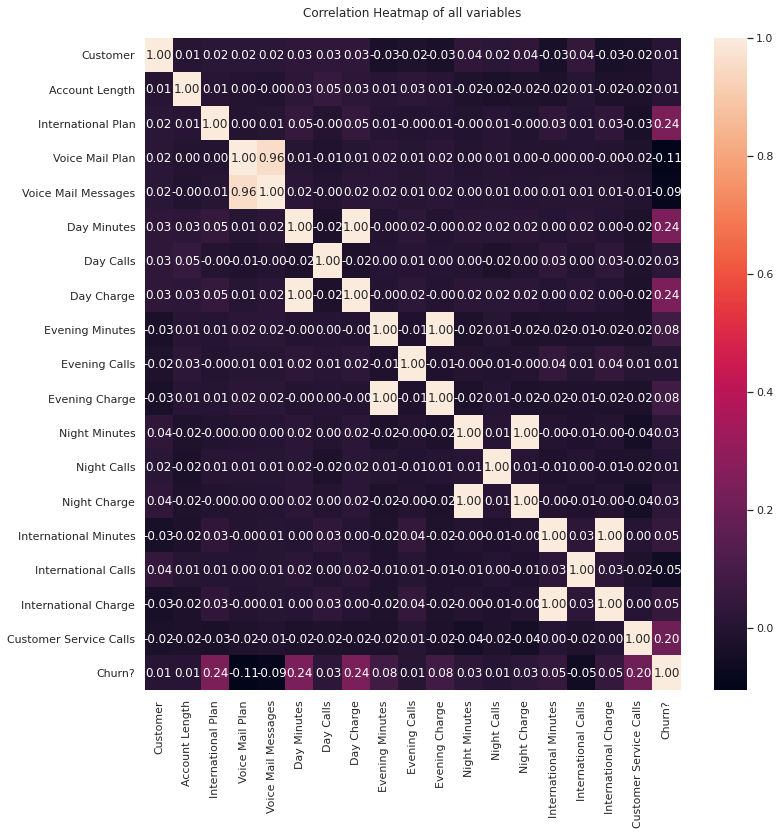

In [ ]:
plt.figure(figsize=(12,12))
sns.set_theme()
sns.heatmap(df.corr(),annot=True,  fmt=".2f")
plt.title('Correlation Heatmap of all variables\n')
#ax = sns.heatmap(uniform_data,annot=True,)

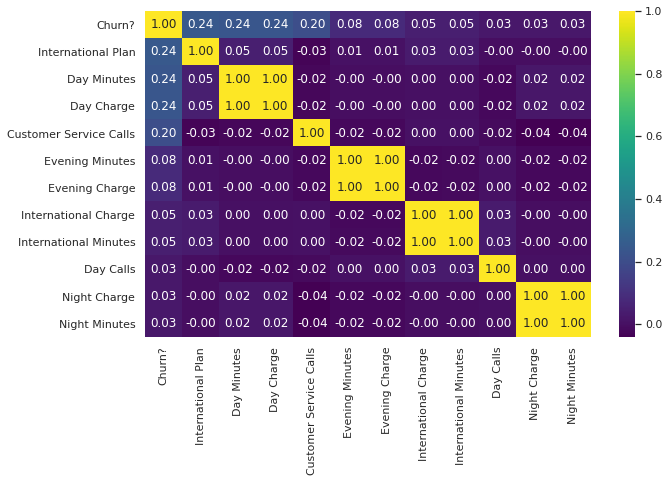

In [ ]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Churn?')['Churn?'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='.2f',cmap = 'viridis')

There aren't many relationships that are correlated. Some of them such as a 'Time of Day' minutes and 'Time of Day Charge' are completly correlated which is intuitive since the more minutes the higher the charge, it doesn't provide much insight. 

The following variables were the ones with the most correlation:

In [ ]:
interest = ['International Plan', 'Day Minutes', 'Day Charge', 'Customer Service Calls']

These may be worth exploring

### Looking at relationships of variables of Interest


Relationsip between Churn and International Plan

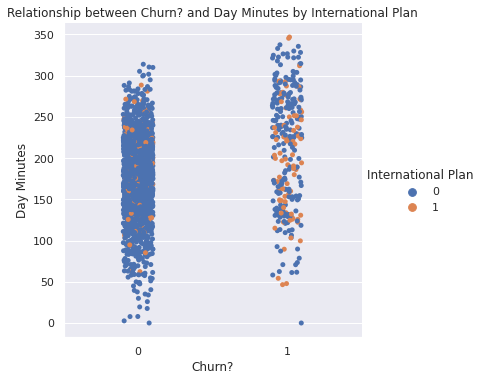

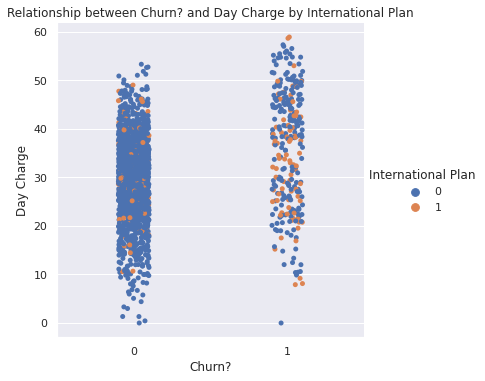

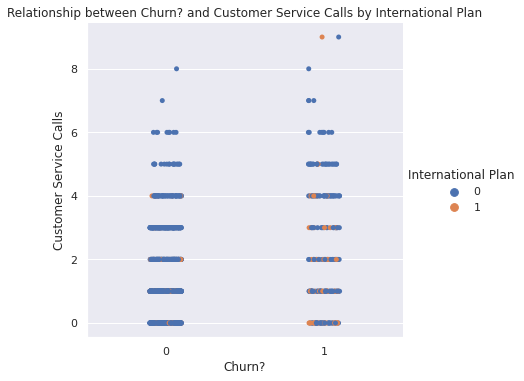

In [ ]:
for col in interest:
  if col == 'International Plan':
    #Since International Plan is a dummy variable
    pass
  else:  
    ax = sns.catplot(x="Churn?", y=col, hue="International Plan", kind="strip", data=df)
    ax.set(title='Relationship between Churn? and {} by International Plan'.format(col))

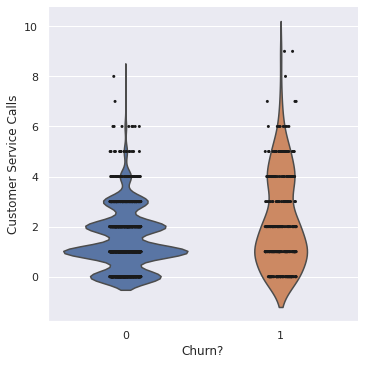

In [ ]:
g = sns.catplot(x="Churn?", y="Customer Service Calls", kind="violin", inner=None, data=df)
sns.stripplot(x="Churn?", y="Customer Service Calls", color="k", size=3, data=df, ax=g.ax)

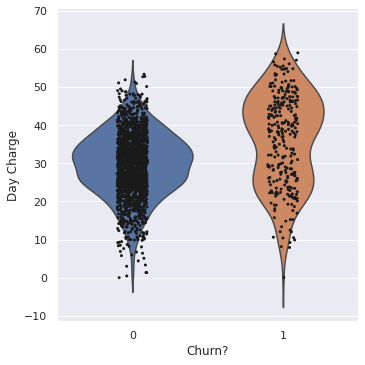

In [ ]:
g = sns.catplot(x="Churn?", y="Day Charge", kind="violin", inner=None, data=df)
sns.stripplot(x="Churn?", y="Day Charge", color="k", size=3, data=df, ax=g.ax)

##Conclusions




* The data is very clean, and it has no missing variables
* The data is not very correlated with in itself, attempting regressions may not provide the best insight but it may be worth it. 
* There may be a need to look further into the relationship between Customer Service Calls and Churn. Mainly the more Customer Service Calls there are customer churn more. 
* It may be worth it looking at lowering Day Charge calls, since there is some correlation between Day Minutes/Charge and Churn. 

